<a href="https://colab.research.google.com/github/b-maxim/ML_MB/blob/main/%D0%94%D0%97_1_CV_and_18102023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

**Для разминки**

In [7]:
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
dataset=datasets.fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [40]:
dataset

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [167]:
data, label = dataset.data, dataset.target

In [168]:
label

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [169]:
label = label.astype(int)

In [170]:
label

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [171]:
data.shape

(70000, 784)

In [172]:
label.shape

(70000,)

In [173]:
choose_one_digit=data.iloc[2600]

In [174]:
choose_one_digit = choose_one_digit.values
#choose_one_digit = choose_one_digit.to_numpy()

In [175]:
image = choose_one_digit.reshape(28,28)

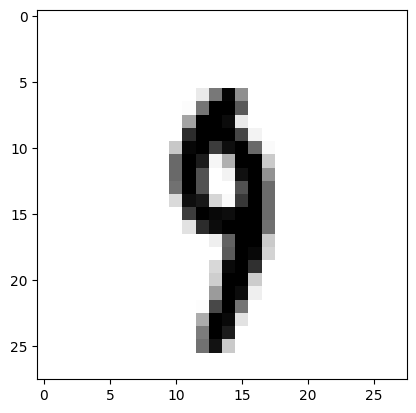

In [176]:
plt.imshow(image, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [177]:
#choose_one_digit=data[2600]
label[2600]

9

In [52]:
###

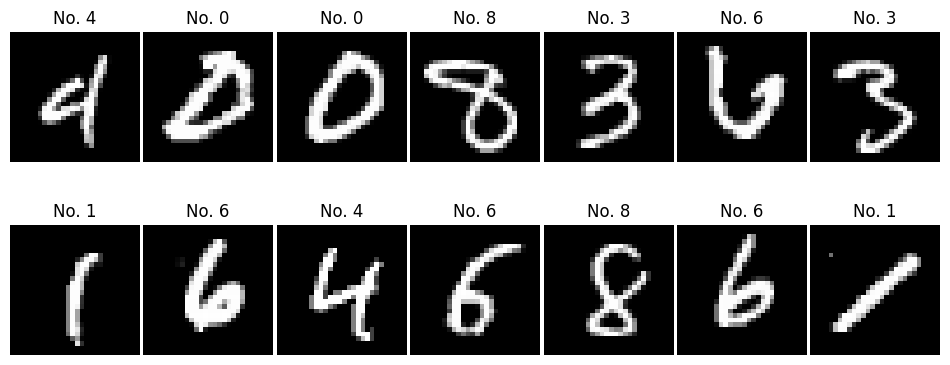

In [32]:
from keras.datasets import mnist
from numpy import random
import matplotlib.pyplot as plt

# загружаем данные и делим их на тренировочные и валидационные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# фиксируем seed для повторяемости результатов
random.seed(42)

# берем 14 случайных изображений
N = random.randint(0, X_train.shape[0], 14)
digits = X_train[N]
labels = y_train[N]

# код для отрисовки
f, ax = plt.subplots(
    2, 7, figsize=(12,5),
    gridspec_kw={'wspace':0.03, 'hspace':0.01},
    squeeze=True
)

for r in range(2):
    for c in range(7):
        index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(digits[index], cmap='gray')
        ax[r,c].set_title('No. {0}'.format(labels[index]))

plt.show()
plt.close()

In [33]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

60000
10000
60000
10000


##Начинаем основную часть ДЗ

In [5]:
###

In [9]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(cv2.__version__)

4.8.0


## Загружаем исходные данные

In [40]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
#train = pd.read_csv('train.csv', delimiter =',', skiprows = 0)
#test = pd.read_csv('test.csv',   delimiter =',', skiprows = 0)

In [ ]:
#train.columns = list(range(0, train.shape[1]))
#test.columns = list(range(0, test.shape[1]))

In [ ]:
#train.isnull().sum().sum ()

In [ ]:
#test.isnull().sum().sum ()

In [22]:
#train = train.dropna ()
#test = test.dropna ()

In [46]:
#train = train.values
#test = test.values

In [ ]:
#train = train.dropna ()
#test = test.dropna ()
#train = train.values(np.uint8)
#test = test.values(np.uint8)
#train = train.to_numpy(np.uint8)
#test  = test.to_numpy(np.uint8)

In [10]:
train = np.loadtxt('train.csv', delimiter =',', skiprows = 1)
test = np.loadtxt('test.csv',   delimiter =',', skiprows = 1)

In [11]:
print(type(test), type(train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [12]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обработки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [13]:
print(train_img.shape)
print(test_img.shape)

(42000, 28, 28)
(28000, 28, 28)


In [58]:
"""winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)"""

In [59]:
"""descriptor = hog.compute(np.uint8(train_img[1])) # 0
print('Descriptor size: %d' % len(descriptor))"""

Descriptor size: 144


In [ ]:
"""from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(range(len(descriptor)), descriptor.reshape(-1))
plt.show()"""

## Визуализируем исходные данные

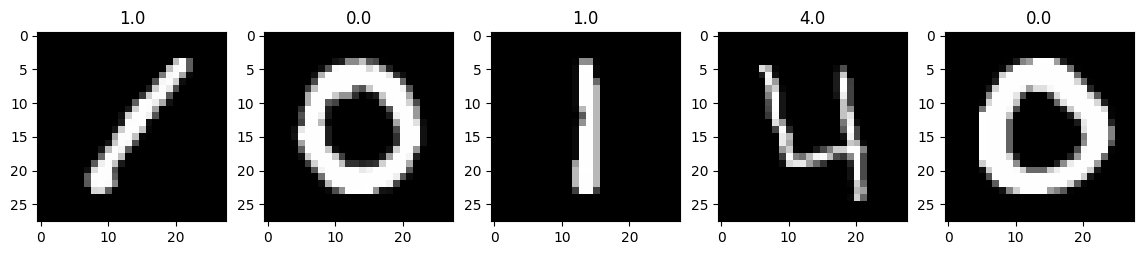

In [14]:
fig = plt.figure(figsize = (20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [15]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [16]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [17]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [18]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

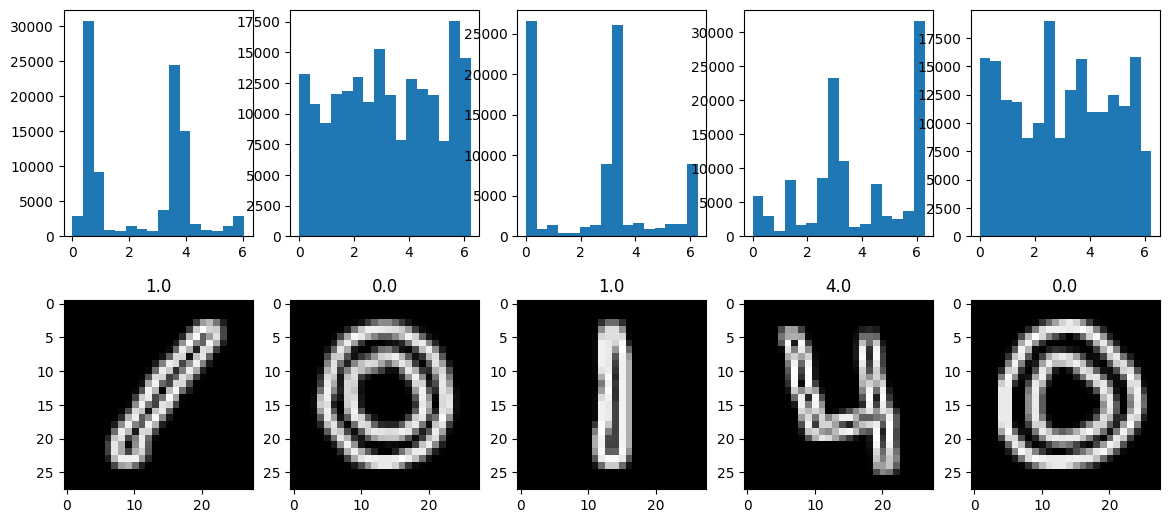

In [20]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

## Вычисляем гистограммы градиентов

In [21]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [22]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

## Нормируем вектор гистограммы

In [23]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [24]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [25]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(train_label, train_hist, test_size = 0.2, random_state = 42)

# 1. Baseline solution

## Вычисляем центроиды каждого из 10 классов

In [26]:
centroids = np.zeros((10, train_hist.shape[1]), dtype = np.float32)

In [27]:
for i in range(10):
    centroids[i] = np.mean(x_train[y_train == i], axis = 0)

## Находим ближайший центройд для валидации

In [28]:
pred_val = np.zeros_like(y_val)
for i in range(len(y_val)):
    distances = np.linalg.norm(centroids - x_val[i], axis=1)
    pred_val[i] = np.argmin(distances)

## Оцениваем качество решение на валидационной выборке

In [29]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.4270238095238095


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.34      0.12      0.18       816
         1.0       0.59      0.76      0.66       909
         2.0       0.33      0.29      0.31       846
         3.0       0.55      0.49      0.51       937
         4.0       0.33      0.31      0.32       839
         5.0       0.46      0.67      0.55       702
         6.0       0.24      0.45      0.31       785
         7.0       0.73      0.41      0.53       893
         8.0       0.39      0.49      0.44       835
         9.0       0.48      0.27      0.34       838

    accuracy                           0.43      8400
   macro avg       0.44      0.43      0.42      8400
weighted avg       0.45      0.43      0.42      8400



In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[102  24  82  30 106  18 221   7 179  47]
 [  0 692   2   0  44   1 139  17  13   1]
 [ 21   0 245 158  12 203  54  16 119  18]
 [ 14   0 113 456   3 235   7   2  98   9]
 [ 11 248   5   2 260   0 205  43  37  28]
 [  3   0  84  97   5 472   3   4  33   1]
 [ 53  26  66  11 116   4 355  13  76  65]
 [  4 113  38  16  66  41 189 368  15  43]
 [ 81   6  68  44  36  44 107   3 411  35]
 [ 11  73  31  20 149  11 222  30  65 226]]


## Предсказания на тестовыйх данных

In [32]:
pred_test = np.zeros(len(test_img), np.uint8)
for i in range(len(test_img)):
    distances = np.linalg.norm(centroids - test_hist[i], axis=1)
    pred_test[i] = np.argmin(distances)

## Визуализируем предсказания

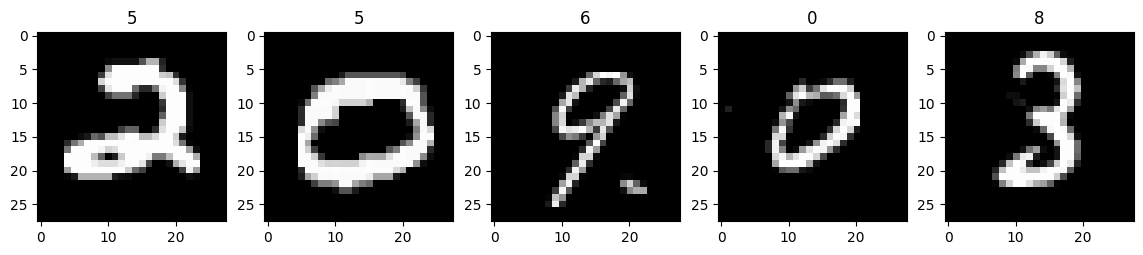

In [33]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [34]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [35]:
!head submit.txt

ImageId,Label
1,5
2,5
3,6
4,0
5,8
6,7
7,6
8,3
9,8


# 2. Linear model' solution

In [36]:
y_train.shape, y_val, x_train.shape, x_val

((33600,),
 array([8., 1., 9., ..., 3., 0., 9.]),
 (33600, 16),
 array([[0.41281347, 0.368608  , 0.18903207, ..., 0.22811746, 0.0608472 ,
         0.26683354],
        [0.65759467, 0.08075626, 0.03301447, ..., 0.01180928, 0.04207296,
         0.11769157],
        [0.3257592 , 0.50370109, 0.21290177, ..., 0.10697524, 0.09831463,
         0.06179984],
        ...,
        [0.06224049, 0.20412941, 0.25190361, ..., 0.29521826, 0.09386408,
         0.07608923],
        [0.21475273, 0.2003948 , 0.3464693 , ..., 0.08707368, 0.11888592,
         0.11854467],
        [0.28903564, 0.36368445, 0.10787793, ..., 0.10475328, 0.1526668 ,
         0.40338432]]))

In [37]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Получаем прогнозные значения модели (переменная predictions)

In [38]:
pred_val = model_lr.predict(x_val)

## Оцениваем качество решение на валидационной выборке

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.5786904761904762


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.37      0.27      0.31       816
         1.0       0.91      0.96      0.94       909
         2.0       0.41      0.30      0.35       846
         3.0       0.59      0.69      0.64       937
         4.0       0.62      0.61      0.61       839
         5.0       0.54      0.63      0.58       702
         6.0       0.41      0.40      0.40       785
         7.0       0.79      0.78      0.79       893
         8.0       0.44      0.54      0.48       835
         9.0       0.57      0.54      0.56       838

    accuracy                           0.58      8400
   macro avg       0.56      0.57      0.57      8400
weighted avg       0.57      0.58      0.57      8400



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[222  10  73  32  48  26 161   4 187  53]
 [  1 873   2   0  20   0   3   4   1   5]
 [ 46   0 255 175  18 165  40  30 104  13]
 [ 21   0  68 645   1 106   8   8  68  12]
 [ 15  54  10   5 511   0 102  42  17  83]
 [  7   0  79 117   0 440   9  10  36   4]
 [118   5  56  18  89  11 314  15  94  65]
 [  6  11  26   7  38  14  32 699  10  50]
 [124   0  34  60  12  48  45   7 448  57]
 [ 46   5  22  28  92   8  59  68  56 454]]


## Предсказания на тестовыйх данных

In [42]:
pred_test = model_lr.predict(test_hist)

## Визуализируем предсказания

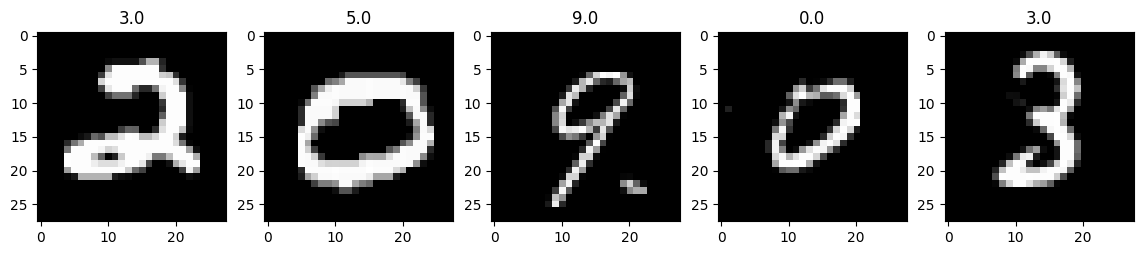

In [43]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

# 3. RF solution

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
clf_rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [79]:
pred_val = clf_rf.predict(x_val)

## Оцениваем качество решение на валидационной выборке

In [80]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.6414285714285715


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.42      0.39      0.41       816
         1.0       0.97      0.96      0.97       909
         2.0       0.47      0.46      0.46       846
         3.0       0.65      0.69      0.67       937
         4.0       0.72      0.70      0.71       839
         5.0       0.64      0.66      0.65       702
         6.0       0.46      0.45      0.45       785
         7.0       0.86      0.79      0.82       893
         8.0       0.51      0.57      0.54       835
         9.0       0.66      0.69      0.67       838

    accuracy                           0.64      8400
   macro avg       0.64      0.64      0.64      8400
weighted avg       0.64      0.64      0.64      8400



In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[322   4  74  33  33  13 126  13 161  37]
 [  2 875   2   0  19   0   1   6   0   4]
 [ 55   0 385 129   3  96  63  18  82  15]
 [ 21   0  90 643   0  92   8   4  71   8]
 [ 20  12  12   1 588   1  79  33   8  85]
 [  6   0  80 106   0 466   7   5  30   2]
 [143   1  59  15  70   5 350  11  76  55]
 [  7   4  38   4  42  12  19 707   7  53]
 [137   0  49  39   9  43  44   4 476  34]
 [ 46   2  31  14  57   4  58  21  29 576]]


## Предсказания на тестовыйх данных

In [83]:
pred_test = clf_rf.predict(test_hist)

## Визуализируем предсказания

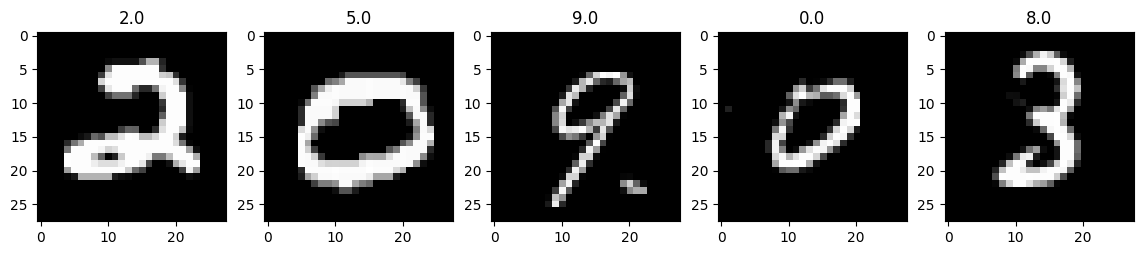

In [84]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

# Готовим файл для отправки

In [85]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [ ]:
!head submit.txt

# 4. CATBOOST solution

In [52]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


In [53]:
from catboost import CatBoostClassifier

In [54]:
model_cb = CatBoostClassifier()
model_cb.fit(x_train, y_train)

Learning rate set to 0.09466
0:	learn: 2.1437510	total: 266ms	remaining: 4m 26s
1:	learn: 2.0280831	total: 403ms	remaining: 3m 21s
2:	learn: 1.9349339	total: 532ms	remaining: 2m 56s
3:	learn: 1.8634587	total: 654ms	remaining: 2m 42s
4:	learn: 1.8062744	total: 784ms	remaining: 2m 35s
5:	learn: 1.7528330	total: 948ms	remaining: 2m 37s
6:	learn: 1.7036981	total: 1.25s	remaining: 2m 57s
7:	learn: 1.6594946	total: 1.48s	remaining: 3m 3s
8:	learn: 1.6223373	total: 1.7s	remaining: 3m 6s
9:	learn: 1.5852105	total: 1.94s	remaining: 3m 11s
10:	learn: 1.5534665	total: 2.2s	remaining: 3m 17s
11:	learn: 1.5260465	total: 2.47s	remaining: 3m 23s
12:	learn: 1.5007060	total: 2.68s	remaining: 3m 23s
13:	learn: 1.4754305	total: 2.92s	remaining: 3m 25s
14:	learn: 1.4523913	total: 3.16s	remaining: 3m 27s
15:	learn: 1.4299146	total: 3.42s	remaining: 3m 30s
16:	learn: 1.4089485	total: 3.67s	remaining: 3m 32s
17:	learn: 1.3907630	total: 3.96s	remaining: 3m 35s
18:	learn: 1.3744174	total: 4.2s	remaining: 3m 36

In [55]:
pred_val = model_cb.predict(x_val)

## Оцениваем качество решение на валидационной выборке

In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.6715476190476191


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.46      0.44      0.45       816
         1.0       0.96      0.96      0.96       909
         2.0       0.54      0.50      0.52       846
         3.0       0.68      0.71      0.70       937
         4.0       0.74      0.72      0.73       839
         5.0       0.64      0.69      0.66       702
         6.0       0.54      0.51      0.53       785
         7.0       0.87      0.83      0.85       893
         8.0       0.52      0.58      0.55       835
         9.0       0.69      0.72      0.71       838

    accuracy                           0.67      8400
   macro avg       0.67      0.67      0.67      8400
weighted avg       0.67      0.67      0.67      8400



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

## Предсказания на тестовыйх данных

In [59]:
pred_test = model_cb.predict(test_hist)

## Визуализируем предсказания

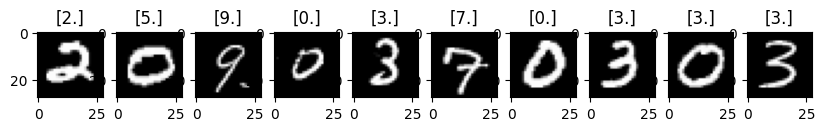

In [60]:
fig = plt.figure(figsize=(10, 6))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(1, 10, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [61]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [ ]:
!head submit.txt

# 5. Метод опорных векторов

In [62]:
from sklearn.svm import LinearSVC

In [65]:
svc = LinearSVC(C = 1.0, class_weight = None, dual = True, fit_intercept = True,
          intercept_scaling = 1, loss = 'squared_hinge', max_iter = 1000,
          multi_class = 'ovr', penalty = 'l2', random_state = 42, tol = 0.0001,
          verbose = 0)

svc.fit(x_train, y_train)

LinearSVC(random_state=42)

In [66]:
pred_val = svc.predict(x_val)

In [67]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.5529761904761905


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.38      0.19      0.25       816
         1.0       0.82      0.98      0.89       909
         2.0       0.43      0.15      0.22       846
         3.0       0.54      0.72      0.62       937
         4.0       0.59      0.47      0.52       839
         5.0       0.48      0.67      0.56       702
         6.0       0.41      0.41      0.41       785
         7.0       0.70      0.78      0.74       893
         8.0       0.43      0.59      0.49       835
         9.0       0.54      0.51      0.52       838

    accuracy                           0.55      8400
   macro avg       0.53      0.55      0.52      8400
weighted avg       0.54      0.55      0.53      8400



In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[154  14  37  46  42  44 175  11 237  56]
 [  0 887   0   1  11   1   1   3   1   4]
 [ 24   0 126 236  22 222  50  42 111  13]
 [ 13   0  26 676   5 118   3  17  65  14]
 [ 18 125   4   6 395   2 111  51  25 102]
 [  5   1  32 131   0 468   9  16  37   3]
 [ 83  16  34  22  75  26 324  27 108  70]
 [  9  23  15   8  24  25  30 700  14  45]
 [ 66   3  10  76  15  59  41  22 490  53]
 [ 35  11  10  41  86  10  51 112  57 425]]


In [70]:
pred_test = svc.predict(test_hist)

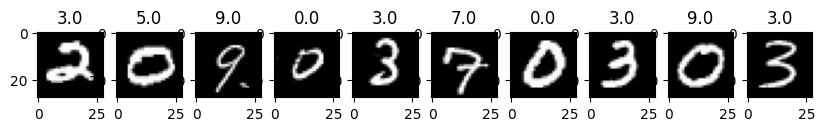

In [71]:
fig = plt.figure(figsize=(10, 6))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(1, 10, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

In [72]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [ ]:
!head submit.txt

# 5.Полносвязная нейронная сеть

In [141]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала на +1
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

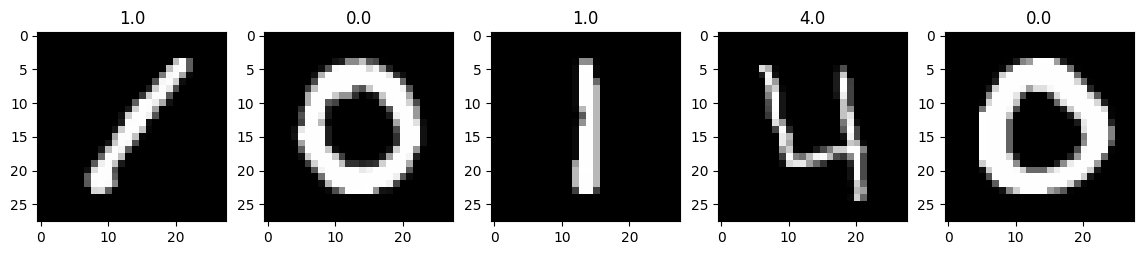

In [142]:
fig = plt.figure(figsize = (20, 10))
for i, img in enumerate(train_img[0:5, :], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img[:,:,0], cmap = 'gray');
    subplot.set_title('%s' % train_label[i - 1]);

Готовим данные для полносвязной сети

In [143]:
import keras

In [144]:
# Нормализуем данные
X_train = train_img.reshape(len(train_img), 784)
X_test = test_img.reshape(len(test_img), 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train -= 127
X_test -= 127
X_train /= 255
X_test /= 255

from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(train_label, X_train, test_size = 0.2, random_state = 42)

from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)
y_val_labels = np_utils.to_categorical(y_val)
x_train.shape

(33600, 784)

In [145]:
# Создаем последовательную модель
model = keras.models.Sequential()

# Добавляем уровни сети
model.add(keras.layers.Dense(1600, input_dim  = 784, activation="relu", kernel_initializer = "normal"))
model.add(keras.layers.Dense(800, activation = 'relu'))
model.add(keras.layers.Dense(90, activation = 'sigmoid'))
model.add(keras.layers.Dense(10, activation = "softmax", kernel_initializer = "normal"))

# Компилируем модель
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Обучаем сеть
#model.fit(x_train, y_train_labels, batch_size = 200, epochs = 20, validation_data = (x_val, y_val_labels))
model.fit(x_train, y_train_labels, batch_size = 300, epochs  = 20, shuffle = True, validation_data=(x_val, y_val_labels))

Epoch 1/20
112/112 [==============================] - 22s 176ms/step - loss: 0.7705 - accuracy: 0.8495 - val_loss: 0.3192 - val_accuracy: 0.9261
Epoch 2/20
112/112 [==============================] - 15s 135ms/step - loss: 0.2251 - accuracy: 0.9457 - val_loss: 0.1909 - val_accuracy: 0.9479
Epoch 3/20
112/112 [==============================] - 15s 139ms/step - loss: 0.1459 - accuracy: 0.9629 - val_loss: 0.1433 - val_accuracy: 0.9583
Epoch 4/20
112/112 [==============================] - 16s 140ms/step - loss: 0.1058 - accuracy: 0.9721 - val_loss: 0.1578 - val_accuracy: 0.9498
Epoch 5/20
112/112 [==============================] - 13s 117ms/step - loss: 0.0813 - accuracy: 0.9785 - val_loss: 0.1139 - val_accuracy: 0.9646
Epoch 6/20
112/112 [==============================] - 14s 125ms/step - loss: 0.0699 - accuracy: 0.9810 - val_loss: 0.1184 - val_accuracy: 0.9635
Epoch 7/20
112/112 [==============================] - 15s 134ms/step - loss: 0.0545 - accuracy: 0.9851 - val_loss: 0.0931 - val_ac

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
predict_x = model.predict(x_val)
pred_val = np.argmax(predict_x, axis=1)

rate = accuracy_score(y_val, pred_val)
print('Accuracy: %s' % rate)
rates = [rate]

263/263 [==============================] - 2s 8ms/step
Accuracy: 0.9777380952380952


In [148]:
models = [model]

In [149]:
tests = [X_test]

In [ ]:
from sklearn.model_selection import cross_val_score

a = cross_val_score(models, x_train, y_train, cv = 3, scoring = "accuracy")

In [151]:
a.mean() # !!!

0.9063690476190477

In [152]:
import cv2
# приводим размерность к удобному для обаботки виду
train_img_for_hist = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img_for_hist = np.resize(test, (test.shape[0], 28, 28))

In [153]:
train_sobel_x = np.zeros_like(train_img_for_hist)
train_sobel_y = np.zeros_like(train_img_for_hist)
for i in range(len(train_img_for_hist)):
    train_sobel_x[i] = cv2.Sobel(train_img_for_hist[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img_for_hist[i], cv2.CV_64F, dx=0, dy=1, ksize=3)
test_sobel_x = np.zeros_like(test_img_for_hist)
test_sobel_y = np.zeros_like(test_img_for_hist)
for i in range(len(test_img_for_hist)):
    test_sobel_x[i] = cv2.Sobel(test_img_for_hist[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img_for_hist[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [154]:
bins = 16

In [155]:
def describe(sobel_x, sobel_y):
        """ Вычисляем дескриптор изображения """

        features = []  # результирующий вектор дескриптора


        (h, w) = sobel_x.shape[0], sobel_x.shape[1]  # размеры изображения
        (cX, cY) = (int(w * 0.5), int(h * 0.5))  # координаты центра изображения

        # делим изображение на четыре равные части и вычисляем координаты сегментов
        segments = [(0, cX, 0, cY),
                    (cX, w, 0, cY),
                    (cX, w, cY, h),
                    (0, cX, cY, h),
                    (int(0.25*w), int(0.75*w), cY, h),
                    (int(0.25*w), int(0.75*w), 0, cY)]

        # готовим маску в виде эллипса для выделения дескрипторов центральной части изображения
        (axesX, axesY) = (int(w * 0.5) // 2, int(h * 0.5) // 2)
        ellip_mask = np.zeros(sobel_x.shape[:2], dtype = np.uint8)
        cv2.ellipse(ellip_mask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)

        # итерируем по сегментам и вычисляем дескрипторы
        for (startX, endX, startY, endY) in segments:
            # формируем маску сегмента
            corner_mask = np.zeros(sobel_x.shape[:2], dtype = np.uint8)
            cv2.rectangle(corner_mask, (startX, startY), (endX, endY), 255, -1)

            # строим гистограмму градиентов с учетом маски сегмента
            hist = histogram(sobel_x, sobel_y, corner_mask)
            features.extend(hist)

        # вычисляем гистограму для центральной области
        hist = histogram(sobel_x, sobel_y, ellip_mask)
        features.extend(hist)

        # возвращаем вектор полученный вектор дескрипторов
        return features

In [156]:
def histogram(sobel_x, sobel_y, mask):
        """ Вычисляет гистограмму в области, заданной маской """
        sob_x = np.zeros_like(sobel_x)
        sob_y = np.zeros_like(sobel_y)
        np.copyto(sob_x, sobel_x)
        np.copyto(sob_y, sobel_y)
        sob_x[mask == 0] = 0
        sob_y[mask == 0] = 0

        g, theta = cv2.cartToPolar(sob_x, sob_y)

        final_hist = np.zeros((len(train_img), bins))
        hist, _ = np.histogram(theta,
                                 bins=bins,
                                 range=(0., 2. * np.pi),
                                 weights=g)
        return hist

In [157]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), bins*7))
for i in range(len(train_img)):
    hist = describe(train_sobel_x[i], train_sobel_y[i])
    train_hist[i] = hist
np.savetxt("train_hst.csv", train_hist, delimiter = ",")

# Гистограммы вычисляются с учетом длины вектора градиента
test_hist = np.zeros((len(test_img), bins*7))
for i in range(len(test_img)):
    hist = describe(test_sobel_x[i], test_sobel_y[i])
    test_hist[i] = hist
np.savetxt("test_hst.csv", test_hist, delimiter = ",")

In [158]:
train_hist = np.loadtxt('train_hst.csv', delimiter =',')
test_hist = np.loadtxt('test_hst.csv', delimiter =',')

In [159]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis = 1)[:, None]
test_hist = test_hist / np.linalg.norm(test_hist, axis = 1)[:, None]

In [160]:
TRAIN_PART = 0.8
predictions = []
predict = model.predict(X_train)
predictions.append(predict)

train_indexes_ = []

other_indexes_ = []
for i in range(0, len(predict)):
    if predict[i].any() != train_label[i].any(): # или .all()
        train_indexes_.append(i)
    else:
        other_indexes_.append(i)
import random
random.shuffle(other_indexes_)

indexes = train_indexes_ + other_indexes_
border = int(TRAIN_PART*len(indexes))
train_indexes = indexes[:border]
val_indexes = indexes[border:]

x_train = []
y_train = []
x_val = []
y_val = []
for i in train_indexes:
    x_train.append(train_hist[i])
    y_train.append(train_label[i])

for i in val_indexes:
    x_val.append(train_hist[i])
    y_val.append(train_label[i])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

1313/1313 [==============================] - 18s 14ms/step


In [161]:
np.random.seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Dense(1600, input_dim=x_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(90, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)
y_val_labels = np_utils.to_categorical(y_val)
model.fit(x_train, y_train_labels, batch_size = 300, epochs = 45, shuffle = True, validation_data=(x_val, y_val_labels))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1600)              180800    
                                                                 
 dense_5 (Dense)             (None, 1000)              1601000   
                                                                 
 dense_6 (Dense)             (None, 90)                90090     
                                                                 
 dense_7 (Dense)             (None, 10)                910       
                                                                 
Total params: 1,872,800
Trainable params: 1,872,800
Non-trainable params: 0
_________________________________________________________________
Epoch 1/45
112/112 [==============================] - 14s 120ms/step - loss: 0.8274 - accuracy: 0.7677 - val_loss: 0.2775 - val_accuracy: 0.9274
Epoch 2/45
112/112 [===========

In [162]:
predict_x = model.predict(x_val)
pred_val = np.argmax(predict_x, axis=1)

rate = accuracy_score(y_val, pred_val)
print('Accuracy: %s' % rate)
rates = [rate]

263/263 [==============================] - 3s 9ms/step
Accuracy: 0.9809523809523809


In [163]:
models.append(model)

In [164]:
tests.append(test_hist)

In [165]:
from sklearn.model_selection import cross_val_score

a = cross_val_score(models,x_train, y_train, cv = 3, scoring = "accuracy")

In [166]:
a.mean() # !!! bellissimo

0.9500297619047618